## 1. Cities in Sweden - create dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Use your DataFrame to print out all the cities. 

In [2]:
#Creates a data frame with two columns: Kommun and Population
cities = pd.DataFrame({"Kommun":["Malmö", "Stockholm", "Uppsala", "Göteborg"], "Population":[347949, 975551, 233839, 583056]})
cities

,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


In [3]:
#Prints out the cities (and not the population)
cities["Kommun"]

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

### b) Select only the row which contains Göteborg. Do this by using the name Göteborg.

In [4]:
#Prints out Göteborg by row index
#cities.iloc[3]

#Prints out Göteborg by name
cities[cities.Kommun == "Göteborg"]

,Kommun,Population
3,Göteborg,583056


### c) Sort the cities by population from largest to smallest.

In [5]:
#Sort the values descending, reset the index and drops the old index
cities = cities.sort_values(by="Population", ascending=False).reset_index(drop=True)
cities

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949
3,Uppsala,233839


### d) Filter out the three largest cities.

In [6]:
#Saves the three largest cities in a new variable and prints them out
largest_cities = cities.head(3)
largest_cities

,Kommun,Population
0,Stockholm,975551
1,Göteborg,583056
2,Malmö,347949


### e) Create a population (%) column.

In [7]:
#Add % of population
cities["Population (%)"] = cities["Population"]/10379295*100
cities

,Kommun,Population,Population (%)
0,Stockholm,975551,9.399010
1,Göteborg,583056,5.617491
2,Malmö,347949,3.352338
3,Uppsala,233839,2.252937


## 2. Cities in Sweden - Real Dataset

### a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

In [8]:
cities = pd.read_excel("Filer/komtopp50_2020.xlsx", sheet_name=1)
cities.head(8)
#cities.info
#cities.describe

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,Folkmängd per kommun 31 december 2020 jämfört ...,NaN,NaN,NaN,NaN,NaN
2,Sorterat i alfabetisk ordning. Rangordning frå...,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,Rang,NaN,Kommun,Folkmängd 31 december,NaN,Förändring
5,2020,2019.0,NaN,2020,2019.0,%
6,83,84.0,Ale,31868,31402.0,1.483982
7,64,64.0,Alingsås,41602,41420.0,0.439401


In [9]:
cities.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
291,54,55.0,Österåker,46644,45574.0,2.34783
292,116,115.0,Östhammar,22251,22250.0,0.004494
293,160,159.0,Östra Göinge,15017,15007.0,0.066636
294,284,284.0,Överkalix,3289,3315.0,-0.784314
295,279,279.0,Övertorneå,4217,4299.0,-1.90742


### b) Clean your data.

In [10]:
def clean(datafile):
    datafile = datafile.rename({"Unnamed: 0":"Rang 2020", "Unnamed: 1":"Rang 2019", "Unnamed: 2":"Kommun", "Unnamed: 3":"Folkmängd 2020", "Unnamed: 4":"Folkmängd 2019", "Unnamed: 5":"Förändring"}, axis="columns")
    datafile = datafile.iloc[6:]
    datafile = datafile.reset_index(drop=True)
    datafile["Rang 2019"] = datafile["Rang 2019"].astype(int)
    datafile["Folkmängd 2019"] = datafile["Folkmängd 2019"].astype(int)
    return datafile

In [11]:
cities = clean(cities)
cities

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.34074
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.34783
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


### c) Sort the cities by population from largest to smallest.

In [12]:
#Sorts the values by Folkmängd 2020
cities.sort_values(by="Folkmängd 2020", ascending=False)

#Saves the five largest cities
largest_cities = cities.sort_values(by="Folkmängd 2020", ascending=False).head()
largest_cities

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.65167
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822


### d) Filter out the five smallest cities.

In [13]:
#Saves the five smallest cities
smallest_cities = cities.sort_values(by="Folkmängd 2020").head()
smallest_cities

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
12,290,290,Bjurholm,2387,2408,-0.872093
194,289,289,Sorsele,2442,2489,-1.888309
29,288,288,Dorotea,2498,2551,-2.077617
5,287,287,Arjeplog,2718,2785,-2.405745
271,286,286,Åsele,2805,2794,0.393701


### e) Use the DataFrame to calculate Sweden's population in 2019 and 2020.

In [14]:
#Calculates the sum of all cities for 2019 and 2020
print(f"The total population of the 290 largest cities in Sweden 2019 were: {sum(cities['Folkmängd 2019'])}")
print(f"The total population of the 290 largest cities in Sweden 2020 were: {sum(cities['Folkmängd 2020'])}")

The total population of the 290 largest cities in Sweden 2019 were: 10327589
The total population of the 290 largest cities in Sweden 2020 were: 10379295


### f) Plot a bar chart for the five largest cities and the five smallest cities. 

[Text(0.5, 1.0, 'Sveriges 5 minsta kommuner 2020')]

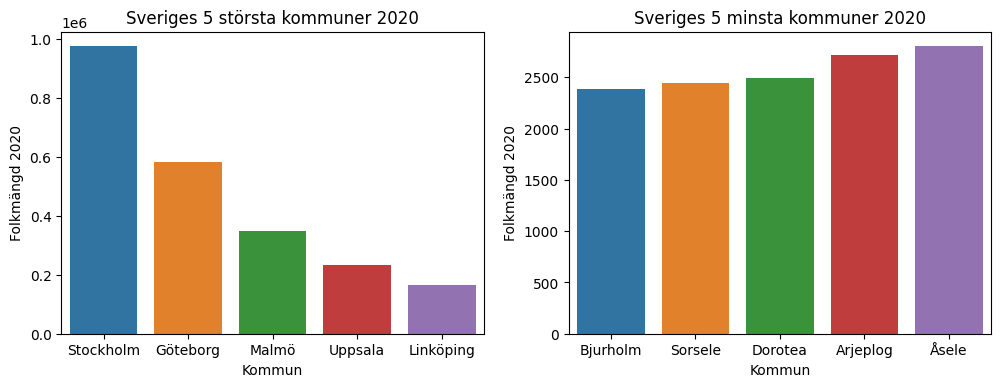

In [15]:
fig, ax = plt.subplots(1, 2, dpi=100, figsize=(12, 4))

sns.barplot(data=largest_cities, x="Kommun", y="Folkmängd 2020", ax=ax[0]).set(title="Sveriges 5 största kommuner 2020")
sns.barplot(data=smallest_cities, x="Kommun", y="Folkmängd 2020", ax=ax[1]).set(title="Sveriges 5 minsta kommuner 2020")

## 3. Cities in Sweden - gender

### a) Clean your data.

In [16]:
#Cleans the female data
cities_f = pd.read_excel("Filer/komtopp50_2020.xlsx", sheet_name=2)
cities_f = clean(cities_f)
cities_f

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,84,85,Ale,15612,15348,1.720094
1,64,64,Alingsås,20900,20774,0.606527
2,123,123,Alvesta,9857,9795,0.632976
3,255,255,Aneby,3318,3350,-0.955224
4,165,164,Arboga,6945,6973,-0.401549
...,...,...,...,...,...,...
285,55,57,Österåker,22997,22442,2.473042
286,117,118,Östhammar,10846,10803,0.398038
287,160,159,Östra Göinge,7270,7262,0.110162
288,284,284,Överkalix,1559,1578,-1.204056


In [17]:
#Cleans the male data
cities_m = pd.read_excel("Filer/komtopp50_2020.xlsx", sheet_name=3)
cities_m = clean(cities_m)
cities_m

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,81,83,Ale,16256,16054,1.258253
1,64,64,Alingsås,20702,20646,0.271239
2,122,123,Alvesta,10367,10339,0.270819
3,255,255,Aneby,3503,3498,0.142939
4,169,168,Arboga,7094,7114,-0.281136
...,...,...,...,...,...,...
285,52,55,Österåker,23647,23132,2.226353
286,115,115,Östhammar,11405,11447,-0.366908
287,158,156,Östra Göinge,7747,7745,0.025823
288,284,284,Överkalix,1730,1737,-0.402994


In [18]:
#Creates a new "Kön"-column and adds the gender to it
cities_f["Kön"] = "Kvinna"
cities_f

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,84,85,Ale,15612,15348,1.720094,Kvinna
1,64,64,Alingsås,20900,20774,0.606527,Kvinna
2,123,123,Alvesta,9857,9795,0.632976,Kvinna
3,255,255,Aneby,3318,3350,-0.955224,Kvinna
4,165,164,Arboga,6945,6973,-0.401549,Kvinna
...,...,...,...,...,...,...,...
285,55,57,Österåker,22997,22442,2.473042,Kvinna
286,117,118,Östhammar,10846,10803,0.398038,Kvinna
287,160,159,Östra Göinge,7270,7262,0.110162,Kvinna
288,284,284,Överkalix,1559,1578,-1.204056,Kvinna


In [19]:
cities_m["Kön"] = "Man"
cities_m

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...,...,...
285,52,55,Österåker,23647,23132,2.226353,Man
286,115,115,Östhammar,11405,11447,-0.366908,Man
287,158,156,Östra Göinge,7747,7745,0.025823,Man
288,284,284,Överkalix,1730,1737,-0.402994,Man


### b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.

In [20]:
#Merge the data
cities_full = cities_m.append(cities_f)
cities_full = cities_full.drop(cities_full.columns[:2], axis=1)
cities_full = cities_full.set_index("Kommun")
cities_full

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
Kommun,,,,
Ale,16256,16054,1.258253,Man
Alingsås,20702,20646,0.271239,Man
Alvesta,10367,10339,0.270819,Man
Aneby,3503,3498,0.142939,Man
Arboga,7094,7114,-0.281136,Man
...,...,...,...,...
Österåker,22997,22442,2.473042,Kvinna
Östhammar,10846,10803,0.398038,Kvinna
Östra Göinge,7270,7262,0.110162,Kvinna


### c) Extract and change column name from the total DataFrame.

In [21]:
total_pop = pd.DataFrame({"Kommun":cities["Kommun"], "Total Pop 2020":cities["Folkmängd 2020"], "Total Pop 2019": cities["Folkmängd 2019"], "Total Förändring": cities["Förändring"]}).set_index("Kommun")
total_pop

,Total Pop 2020,Total Pop 2019,Total Förändring
Kommun,,,
Ale,31868,31402,1.483982
Alingsås,41602,41420,0.439401
Alvesta,20224,20134,0.447005
Aneby,6821,6848,-0.394276
Arboga,14039,14087,-0.34074
...,...,...,...
Österåker,46644,45574,2.34783
Östhammar,22251,22250,0.004494
Östra Göinge,15017,15007,0.066636


### d) Merge this data with the data in b).

In [22]:
cities_gender_full = pd.merge(cities_full, total_pop, left_index=True, right_index=True)
cities_gender_full

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring
Kommun,,,,,,,
Ale,16256,16054,1.258253,Man,31868,31402,1.483982
Ale,15612,15348,1.720094,Kvinna,31868,31402,1.483982
Alingsås,20702,20646,0.271239,Man,41602,41420,0.439401
Alingsås,20900,20774,0.606527,Kvinna,41602,41420,0.439401
Alvesta,10367,10339,0.270819,Man,20224,20134,0.447005
...,...,...,...,...,...,...,...
Östra Göinge,7270,7262,0.110162,Kvinna,15017,15007,0.066636
Överkalix,1730,1737,-0.402994,Man,3289,3315,-0.784314
Överkalix,1559,1578,-1.204056,Kvinna,3289,3315,-0.784314


### e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities.

In [23]:
ten_largest_gender = cities_gender_full.sort_values("Total Pop 2020", ascending=False).head(20)
ten_largest_gender

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring
Kommun,,,,,,,
Stockholm,482982,482220,0.158019,Man,975551,974073,0.151734
Stockholm,492569,491853,0.145572,Kvinna,975551,974073,0.151734
Göteborg,292505,290308,0.756782,Man,583056,579281,0.65167
Göteborg,290551,288973,0.546072,Kvinna,583056,579281,0.65167
Malmö,175411,173543,1.07639,Kvinna,347949,344166,1.099179
Malmö,172538,170623,1.122357,Man,347949,344166,1.099179
Uppsala,115692,114333,1.188633,Man,233839,230767,1.331213
Uppsala,118147,116434,1.47122,Kvinna,233839,230767,1.331213
Linköping,80561,79868,0.867682,Kvinna,164616,163051,0.959822


In [24]:
ten_smallest_gender = cities_gender_full.sort_values("Total Pop 2020").head(20)
ten_smallest_gender

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring
Kommun,,,,,,,
Bjurholm,1233,1249,-1.281025,Man,2387,2408,-0.872093
Bjurholm,1154,1159,-0.431406,Kvinna,2387,2408,-0.872093
Sorsele,1285,1319,-2.57771,Man,2442,2489,-1.888309
Sorsele,1157,1170,-1.111111,Kvinna,2442,2489,-1.888309
Dorotea,1171,1195,-2.008368,Kvinna,2498,2551,-2.077617
Dorotea,1327,1356,-2.138643,Man,2498,2551,-2.077617
Arjeplog,1426,1458,-2.194787,Man,2718,2785,-2.405745
Arjeplog,1292,1327,-2.637528,Kvinna,2718,2785,-2.405745
Åsele,1469,1456,0.892857,Man,2805,2794,0.393701


[Text(0.5, 1.0, 'Gender Distribution for the Ten Largest Cities')]

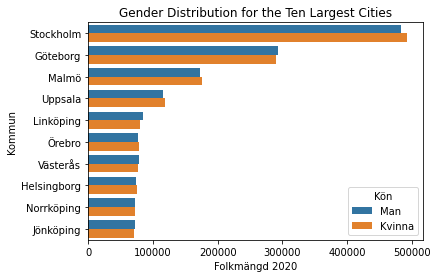

In [25]:
sns.barplot(data=ten_largest_gender, x="Folkmängd 2020", y=ten_largest_gender.index, hue="Kön").set(title="Gender Distribution for the Ten Largest Cities")

[Text(0.5, 1.0, 'Gender Distribution for the Ten Smallest Cities')]

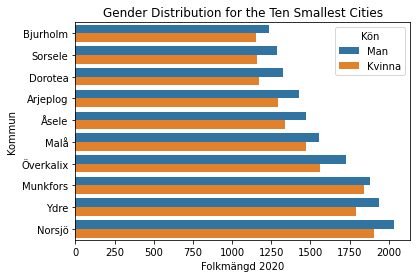

In [26]:
sns.barplot(data=ten_smallest_gender, x="Folkmängd 2020", y=ten_smallest_gender.index, hue="Kön").set(title="Gender Distribution for the Ten Smallest Cities")

### f) Create a pie chart showing the total male and female population in Sweden 2020.

[Text(0.5, 1.0, 'Gender Distribution in Sweden 2020')]

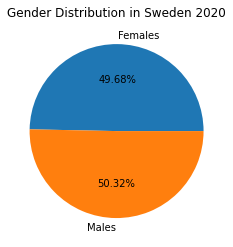

In [27]:
number_of_females = cities_f["Folkmängd 2020"].sum()
number_of_males = cities_m["Folkmängd 2020"].sum()
fig, ax = plt.figure(), plt.axes()
fig.set_facecolor("white")
ax.pie([number_of_females, number_of_males], labels=["Females", "Males"], autopct='%1.2f%%')
ax.set(title="Gender Distribution in Sweden 2020")


### g) Create a barplot showing the cities with the five largest percentual gender difference in 2020.

In [28]:
#Creates gender difference
gender_difference = pd.DataFrame({"Kommun":cities_f["Kommun"], "Gender Difference": (abs(cities_f["Folkmängd 2020"]-cities_m["Folkmängd 2020"]))/cities["Folkmängd 2020"]})
gender_difference = gender_difference.set_index("Kommun")
gender_difference

,Gender Difference
Kommun,
Ale,0.020208
Alingsås,0.004759
Alvesta,0.025218
Aneby,0.027122
Arboga,0.010613
...,...
Österåker,0.013935
Östhammar,0.025122
Östra Göinge,0.031764


In [29]:
#Adds gender difference to the full gender dataset
cities_gender_full = pd.merge(cities_gender_full, gender_difference, left_index=True, right_index=True)
cities_gender_full

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring,Gender Difference
Kommun,,,,,,,,
Ale,16256,16054,1.258253,Man,31868,31402,1.483982,0.020208
Ale,15612,15348,1.720094,Kvinna,31868,31402,1.483982,0.020208
Alingsås,20702,20646,0.271239,Man,41602,41420,0.439401,0.004759
Alingsås,20900,20774,0.606527,Kvinna,41602,41420,0.439401,0.004759
Alvesta,10367,10339,0.270819,Man,20224,20134,0.447005,0.025218
...,...,...,...,...,...,...,...,...
Östra Göinge,7270,7262,0.110162,Kvinna,15017,15007,0.066636,0.031764
Överkalix,1730,1737,-0.402994,Man,3289,3315,-0.784314,0.051991
Överkalix,1559,1578,-1.204056,Kvinna,3289,3315,-0.784314,0.051991


In [30]:
largest_gender_difference = cities_gender_full.sort_values("Gender Difference", ascending=False).head(10)
largest_gender_difference

,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total Pop 2020,Total Pop 2019,Total Förändring,Gender Difference
Kommun,,,,,,,,
Pajala,3188,3222,-1.055245,Man,5966,6052,-1.421018,0.068723
Pajala,2778,2830,-1.837456,Kvinna,5966,6052,-1.421018,0.068723
Dorotea,1327,1356,-2.138643,Man,2498,2551,-2.077617,0.06245
Dorotea,1171,1195,-2.008368,Kvinna,2498,2551,-2.077617,0.06245
Bräcke,2916,2978,-2.081934,Kvinna,6181,6298,-1.857733,0.056463
Bräcke,3265,3320,-1.656627,Man,6181,6298,-1.857733,0.056463
Sorsele,1285,1319,-2.57771,Man,2442,2489,-1.888309,0.052416
Sorsele,1157,1170,-1.111111,Kvinna,2442,2489,-1.888309,0.052416
Överkalix,1559,1578,-1.204056,Kvinna,3289,3315,-0.784314,0.051991


[Text(0.5, 1.0, 'Population for the Cities with the Largest Gender Difference')]

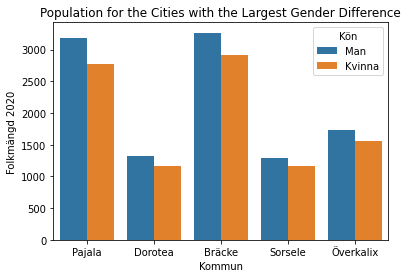

In [31]:
sns.barplot(data=largest_gender_difference, x=largest_gender_difference.index, y="Folkmängd 2020", hue="Kön").set(title="Population for the Cities with the Largest Gender Difference")

### h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020

In [32]:
largest_populational_growth = cities.sort_values("Förändring", ascending=False).head(5)
largest_populational_growth

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
232,164,169,Trosa,14309,13747,4.088165
240,87,89,Upplands-Bro,30195,29346,2.893069
116,242,242,Lekeberg,8472,8234,2.890454
269,187,191,Åre,12049,11727,2.7458
285,54,55,Österåker,46644,45574,2.34783


[Text(0.5, 1.0, 'Populational Growth for the Fastest Growing Cities'),
 Text(0, 0.5, 'Change in Percentage Between 2019 and 2020')]

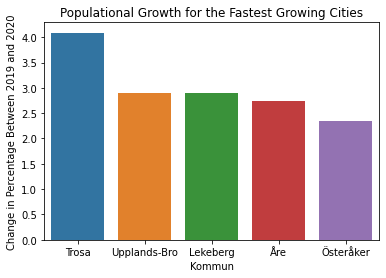

In [37]:
sns.barplot(data=largest_populational_growth, x="Kommun", y="Förändring").set(title="Populational Growth for the Fastest Growing Cities", ylabel="Change in Percentage Between 2019 and 2020")